In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from matplotlib import rc
import matplotlib.font_manager as fm

In [3]:
# user_spec과 loan_result을 merge한 csv 파일 불러오기
user_loan = user_loan = pd.read_csv('C:/Users/김다은/Desktop/2022빅콘테스트_데이터분석리그_데이터분석분야_퓨처스부문_데이터셋_220908/user_loan.csv')

In [4]:
# 중복 항목 처리
user_loan.replace('LIVING', '생활비', inplace=True)
user_loan.replace('BUSINESS','사업자금', inplace=True)
user_loan.replace('SWITCHLOAN','대환대출', inplace=True)
user_loan.replace('ETC','기타', inplace=True)
user_loan.replace('BUYCAR','자동차구입', inplace=True)
user_loan.replace('INVEST','투자', inplace=True)
user_loan.replace('HOUSEDEPOSIT','전월세보증금', inplace=True)
user_loan.replace('BUYHOUSE','주택구입', inplace=True)

In [5]:
user_loan.dropna(inplace=True)

In [6]:
# 한글 깨짐 방지를 위한 폰트 지정
fm._rebuild()
fm.get_fontconfig_fonts()

font_location = './ttf/GmarketSansTTFLight.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [7]:
# 대출 승인 여부를 기준으로 데이터프레임 나눔
yes = user_loan[user_loan['is_applied'] == 1].sample(35872, random_state=42)
no = user_loan[user_loan['is_applied'] == 0].sample(35872, random_state=42)

In [8]:
# 카테고리컬 컬럼 리스트
columnlist = [
    'income_type',
    'employment_type',
    'houseown_type',
    'purpose',
    'personal_rehabilitation_yn',
    'personal_rehabilitation_complete_yn',
    'bank_id',
    'product_id'
             ]

In [9]:
# 대출 승인 여부를 기준으로 컬럼별 비율을 산출하는 함수
def ratio(A, dfA, dfB, name):
    df = pd.DataFrame()
    table = pd.DataFrame()
    vector = []
    for a in A:
        vector.append(dfA[a]/dfB[a]*100)
    table[f'{name}'] = vector
    
    table.index = A
    print(table.sort_values(by=f'{name}', ascending=False))
    return table

In [12]:
# 파이 차트를 그리는 함수
def piechart(name):
    yes_name = yes[name].value_counts()
    no_name = no[name].value_counts()
    
    Y = sorted([y for y in yes_name.index])
    N = sorted([n for n in no_name.index])

    plt.title(f'{name}_Y')
    plt.pie(yes_name,labels=Y, explode = [0.1 for i in Y])
    plt.savefig(f'./visual/{name}_Y.jpg')
    plt.show()
    plt.title(f'{name}_N')
    plt.pie(no_name,labels=N, explode = [0.1 for i in N])
    plt.savefig(f'./visual/{name}_N.jpg')
    plt.show()

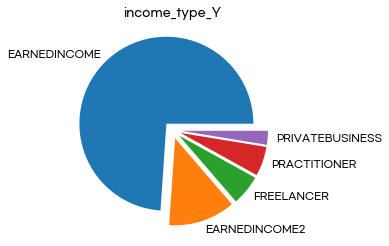

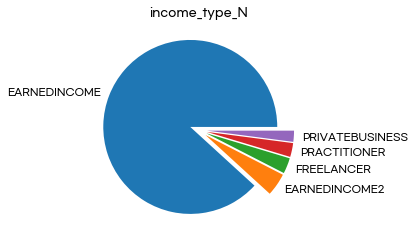

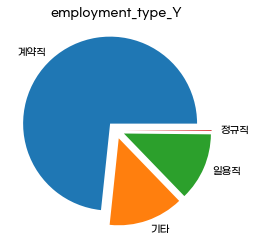

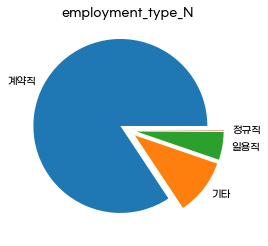

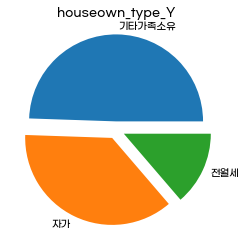

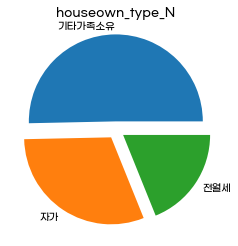

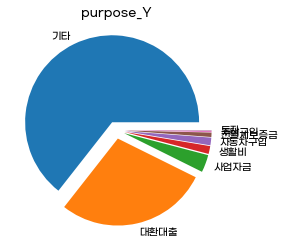

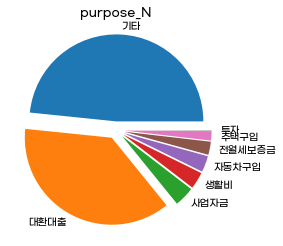

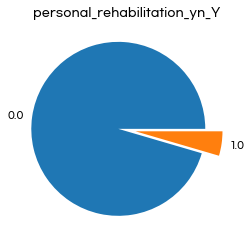

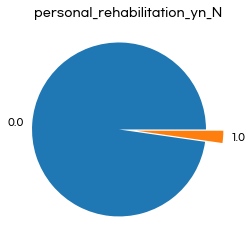

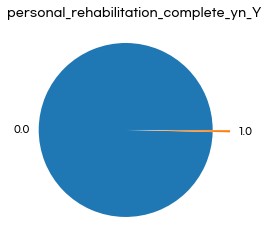

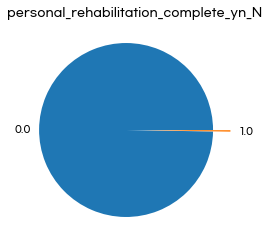

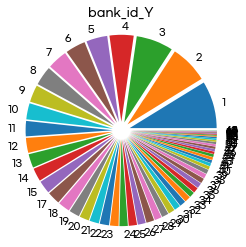

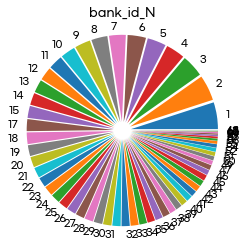

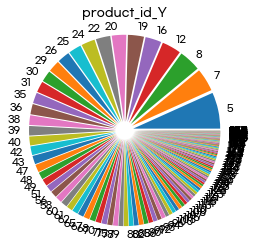

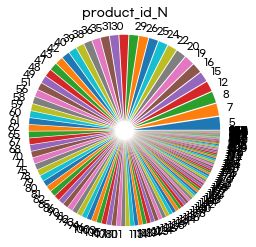

In [13]:
for name in columnlist:
    piechart(name)